# Load Data

In [1]:
import pandas as pd, numpy as np, seaborn as sns

df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2]:
df.drop(columns=['Id'], inplace=True)

df.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

In [3]:
num = [x for x in df.columns if df.dtypes[x] in ('int64', 'float')]
cat = [x for x in df.columns if df.dtypes[x] == 'object']
target = 'SalePrice'
num.remove(target)

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=0)

# Explore

In [5]:
corr = train.corr(numeric_only=True)
corr[target].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790636
GrLivArea        0.721707
GarageCars       0.660927
GarageArea       0.646603
TotalBsmtSF      0.635535
1stFlrSF         0.620740
FullBath         0.578134
TotRmsAbvGrd     0.542658
YearBuilt        0.521242
YearRemodAdd     0.517822
GarageYrBlt      0.494154
MasVnrArea       0.493482
Fireplaces       0.470320
BsmtFinSF1       0.401390
LotFrontage      0.360274
OpenPorchSF      0.320193
2ndFlrSF         0.320141
WoodDeckSF       0.311813
HalfBath         0.283762
LotArea          0.252766
BsmtFullBath     0.226432
BsmtUnfSF        0.206736
BedroomAbvGr     0.182258
ScreenPorch      0.096740
3SsnPorch        0.057561
MoSold           0.041369
PoolArea         0.027441
BsmtHalfBath    -0.010994
BsmtFinSF2      -0.020622
LowQualFinSF    -0.023128
MiscVal         -0.024750
YrSold          -0.045628
OverallCond     -0.053643
MSSubClass      -0.084312
EnclosedPorch   -0.129519
KitchenAbvGr    -0.136104
Name: SalePrice, dtype: float64

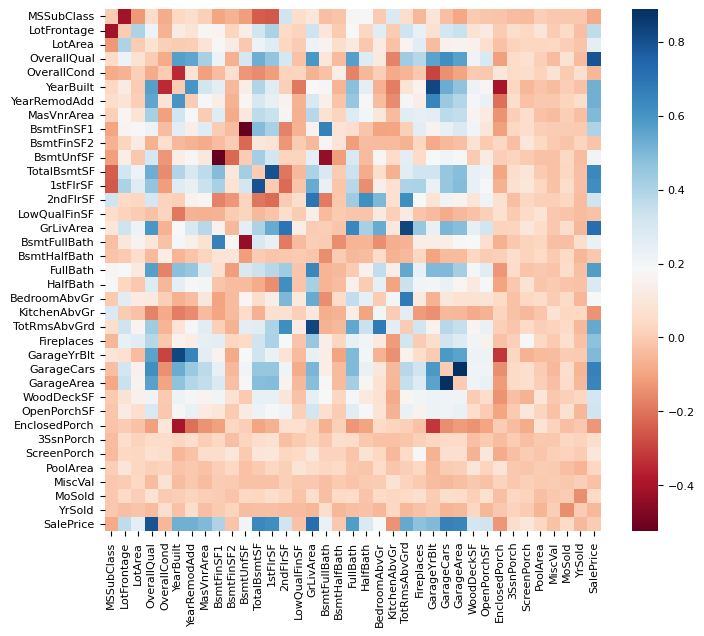

In [6]:
np.fill_diagonal(corr.values, 0)
sns.heatmap(corr, cmap='RdBu');

count      1168.000000
mean     180808.898973
std       78499.911304
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64


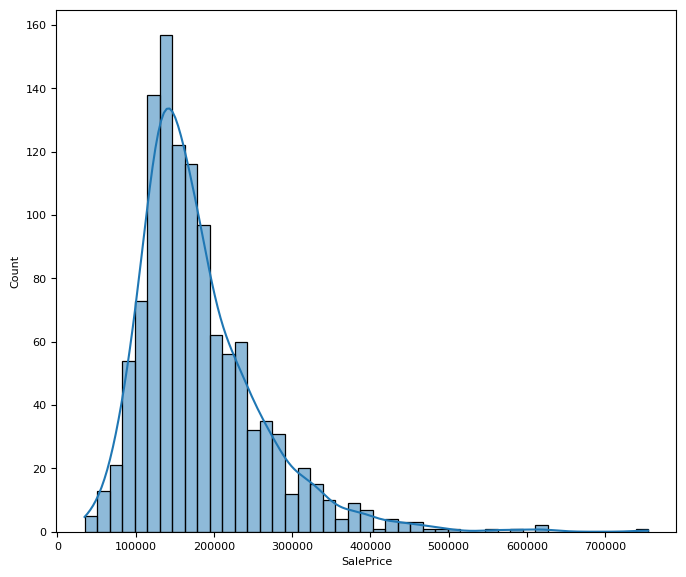

In [7]:
print(train[target].describe())
sns.histplot(train[target], kde=True);

In [8]:
corr[target].sort_values(ascending=False).index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', '3SsnPorch',
       'MoSold', 'PoolArea', 'SalePrice', 'BsmtHalfBath', 'BsmtFinSF2',
       'LowQualFinSF', 'MiscVal', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [9]:
'GrLivArea', '1stFlrSF'

('GrLivArea', '1stFlrSF')

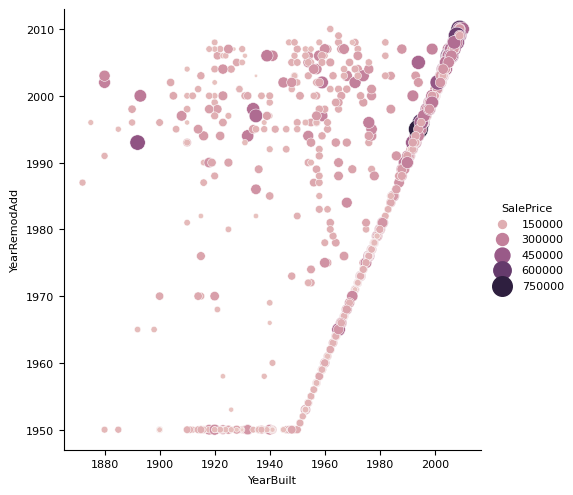

In [10]:
sns.relplot(train, x='YearBuilt', y='YearRemodAdd', hue=target, size=target, sizes=(1, 200));

In [11]:
train.query('SalePrice>700000')[['YearBuilt', 'YearRemodAdd']]

,YearBuilt,YearRemodAdd
691,1994,1995


In [12]:
train['YearRemodAdd'] - train['YearBuilt']

618      0
870      0
92      85
817      0
302      1
        ..
763      0
835     45
1216     0
559      1
684      0
Length: 1168, dtype: int64

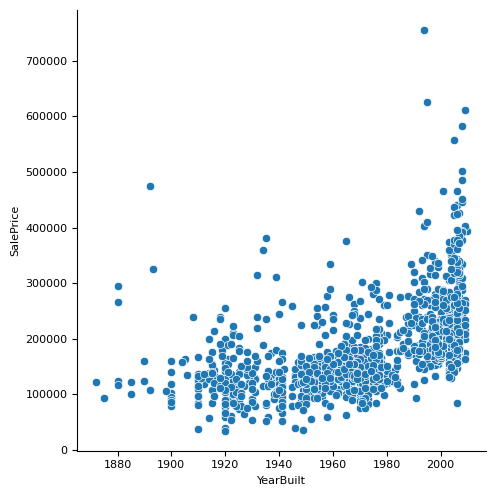

In [13]:
sns.relplot(train, x='YearBuilt', y=target);

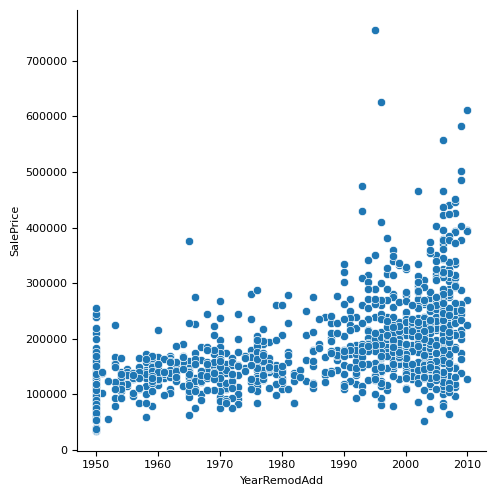

In [14]:
sns.relplot(train, x='YearRemodAdd', y=target);

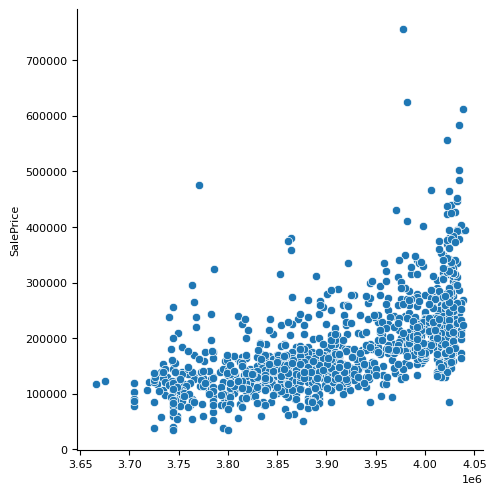

In [50]:
sns.relplot(train, x=(train['YearRemodAdd'] * train['YearBuilt']), y=target);

In [48]:
train['YearBuiltRemodel'] = (train['YearRemodAdd'] * train['YearBuilt']) * (1/train['YrSold'])

In [49]:
train.corr(numeric_only=True)[target].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.790636
GrLivArea           0.721707
GarageCars          0.660927
GarageArea          0.646603
TotalBsmtSF         0.635535
1stFlrSF            0.620740
YearBuiltRemodel    0.580406
FullBath            0.578134
TotRmsAbvGrd        0.542658
YearBuilt           0.521242
YearRemodAdd        0.517822
GarageYrBlt         0.494154
MasVnrArea          0.493482
Fireplaces          0.470320
BsmtFinSF1          0.401390
LotFrontage         0.360274
OpenPorchSF         0.320193
2ndFlrSF            0.320141
WoodDeckSF          0.311813
HalfBath            0.283762
LotArea             0.252766
BsmtFullBath        0.226432
BsmtUnfSF           0.206736
BedroomAbvGr        0.182258
ScreenPorch         0.096740
3SsnPorch           0.057561
MoSold              0.041369
PoolArea            0.027441
BsmtHalfBath       -0.010994
BsmtFinSF2         -0.020622
LowQualFinSF       -0.023128
MiscVal            -0.024750
YrSold             -0.045628
OverallCond   

# Pipeline

In [35]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataSelect(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes]

In [37]:
num_pp = Pipeline([
    ('dataselect', DataSelect(num))
    , ('impute', SimpleImputer(strategy='median'))
    , ('scaler', StandardScaler())
])

cat_pp = Pipeline([
    ('dataselect', DataSelect(cat))
    , ('encoder', OneHotEncoder(sparse_output=False))
])

pipe = FeatureUnion([
    ('numeric', num_pp)
#     , ('categorical', cat_pp)
])

pipe.fit(train)
train_pre = pipe.transform(train)
test_pre = pipe.transform(test)

# Model Selection

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
lin = LinearRegression()
lin.fit(train_pre, train[target])
np.sqrt(-cross_val_score(lin, train_pre, train[target], scoring='neg_mean_squared_error')).mean()

32028.47435702323

In [23]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(train_pre, train[target])
np.sqrt(-cross_val_score(dtr, train_pre, train[target], scoring='neg_mean_squared_error')).mean()

40463.62620192791

In [24]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(train_pre, train[target])
np.sqrt(-cross_val_score(rfr, train_pre, train[target], scoring='neg_mean_squared_error')).mean()

29305.91019299344

In [25]:
model_base = rfr

# Tune Model

In [26]:
model_base.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [27]:
from sklearn.model_selection import GridSearchCV
grd = GridSearchCV(model_base
                         , param_grid={ 'random_state': [0]
                                       , 'n_estimators': [100, 200, 300]
                                       , 'max_features': [2, 4, 8, 10]
                                      }
                         , scoring='neg_mean_squared_error')
# grd.fit(train_pre, train[target])
# grd.best_params_

In [28]:
model_tune = RandomForestRegressor(
    random_state=0
    , n_estimators=300
    , max_features=10
#     , max_leaf_nodes=None
#     , max_samples=None
)
model_tune.fit(train_pre, train[target]);

# Validation

In [38]:
print(
    np.sqrt(-cross_val_score(model_base, train_pre, train[target], scoring='neg_mean_squared_error')).mean(),
    np.sqrt(-cross_val_score(model_base, test_pre, test[target], scoring='neg_mean_squared_error')).mean()
)

print(
    np.sqrt(-cross_val_score(model_tune, train_pre, train[target], scoring='neg_mean_squared_error')).mean(),
    np.sqrt(-cross_val_score(model_tune, test_pre, test[target], scoring='neg_mean_squared_error')).mean()
)

29305.91019299344 39817.936855094296
28593.345346409456 39726.29547575848


    ## Multiplying YearBuilt * YearRemodAdd
    29305.91019299344 39817.936855094296
    28593.345346409456 39726.29547575848
    
    ## Baseline
    29701.66889770482 38888.041253125855
    28576.013401852346 38899.51112575973

# Submission

In [30]:
samp = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

pd.DataFrame({
    'Id': samp['Id']
    , 'SalePrice': model_tune.predict(pipe.transform(samp))
}).to_csv('submission.csv', index=False)

# Notes
- tried to remove rows with outliers in Saleprice. It made the model overfit.
- Need to focus on Exploration and make it agile. Not making it rigid.